# K-means clustering

In [60]:
import pandas as pd
from utils import import_df
import json
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from umap import UMAP
from utils import export_df
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans

df = import_df("3-noise-generation-output.json")
df_base = df.copy()
df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
0,0.069769,-5.304294,-9.989233,-3.313071,-2.672482,0.466632,-1.934575,-0.543654,-0.794152,0.040593,...,2.682579,1.049357,0.539067,1.997897,1.440183,0.277093,0.462698,3.196192,3.963271,working-engine-1
1,-0.396607,-7.557986,-6.757172,-4.035399,-1.691554,-1.837123,-0.861492,-0.578646,-0.070114,-1.084699,...,1.089574,0.892152,0.665190,2.834736,2.003717,0.314759,0.469994,2.234707,3.939892,working-engine-1
2,0.843336,-4.064155,-9.813102,-4.427802,-3.048554,-0.725644,-1.227282,0.337728,-0.180079,-0.348343,...,1.738490,0.684112,0.657757,1.623268,1.783158,0.079913,0.598511,2.110562,3.968693,working-engine-1
3,-0.288229,-7.640477,-5.781615,-3.505385,-2.119089,-1.170490,-0.578574,-0.796474,0.391411,0.544625,...,1.079702,0.372437,0.849677,2.632377,1.682203,0.037757,0.722920,1.758257,3.969759,working-engine-1
4,-0.791232,-7.133791,-7.910312,-2.538680,-2.150410,-0.871752,-0.966725,0.189834,-0.712023,-0.627217,...,1.253875,0.658574,0.758675,3.713024,1.625020,0.503656,0.334853,1.777892,3.959930,working-engine-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,-0.455047,-1.966358,0.206042,1.096095,-1.075177,0.715201,1.513090,-0.259385,-0.282248,-0.881456,...,0.489770,0.876538,0.848715,0.924194,0.806776,0.880826,1.127457,2.052010,3.947527,working-engine-2
31796,1.057003,0.223313,4.536409,-0.630462,-0.305872,-0.021064,1.774274,-0.613302,-0.132349,-0.251413,...,-0.448210,0.713084,1.246230,1.348640,1.164167,1.341331,0.947828,1.962668,3.951634,working-engine-2
31797,-0.009944,4.708101,3.201700,-2.997003,1.392459,1.217546,0.505933,0.122175,-0.284000,-0.392447,...,1.665808,1.091673,1.133503,1.573948,0.878939,1.169786,1.051456,0.204291,3.955825,working-engine-2
31798,-2.167536,1.077189,-1.609717,-0.211635,0.795443,0.083935,-0.204140,-1.015827,0.817852,0.171630,...,0.293601,1.175417,1.282980,2.269044,0.845278,0.696941,1.119900,1.417757,3.971053,working-engine-2


In [61]:
df = df.drop("label", axis=1)

## Compute distortions and inertias

- **Distortion**: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
- **Inertia** It is the sum of squared distances of samples to their closest cluster center.

In [62]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in tqdm(K):
    kmean_model = KMeans(init="k-means++", n_clusters=k)
    kmean_model.fit(df)

    distortions.append(
        sum(
            np.min(
                cdist(df, kmean_model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / df.shape[0]
    )
    inertias.append(kmean_model.inertia_)

    mapping1[k] = (
        sum(
            np.min(
                cdist(df, kmean_model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / df.shape[0]
    )
    mapping2[k] = kmean_model.inertia_


  0%|          | 0/9 [00:00<?, ?it/s]

In [63]:
for key, val in mapping1.items():
    print(f"{key} : {val}")

1 : 11.604363891579931
2 : 10.504623513830383
3 : 9.768492042559116
4 : 9.353806906137386
5 : 9.105932548843343
6 : 8.899044663226519
7 : 8.750747182048682
8 : 8.65724888050729
9 : 8.570416804693496


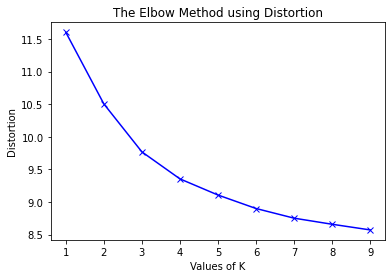

In [64]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [65]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 4548258.812619359
2 : 3691419.8678776934
3 : 3178857.8416579333
4 : 2907247.6811410678
5 : 2753016.9723245213
6 : 2627242.96573935
7 : 2539829.885214331
8 : 2486315.418846564
9 : 2437427.988515544


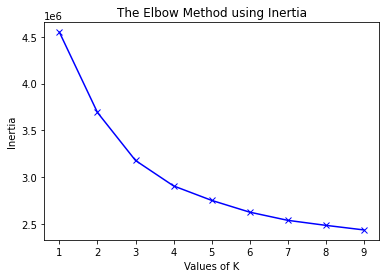

In [66]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## K-means on specific number of clusters

In [67]:
n_clusters = 4
kmeans = KMeans(init="k-means++", n_clusters=n_clusters)
kmeans_fitted = kmeans.fit(df)
# len(kmeans.labels_)

In [68]:
centroids_labels = [
    kmeans_fitted.predict(pd.DataFrame(centroid).T)[0]
    for centroid in kmeans_fitted.cluster_centers_
]
centroids_labels

[0, 1, 2, 3]

In [69]:
centroids_with_labels = dict(zip(centroids_labels, kmeans_fitted.cluster_centers_))
pd.DataFrame(centroids_with_labels).T

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-1.198011,3.049258,0.515146,-0.142667,0.017879,0.142433,0.259723,-0.132121,-0.137640,-0.009396,...,0.892570,0.864118,1.010722,1.007366,1.033191,1.021137,0.985608,0.991337,1.113645,3.945424
1,0.555710,-5.296798,-6.088330,-3.550897,-1.998481,-0.965908,-0.952469,-0.079394,-0.083184,0.011268,...,1.154743,1.023021,0.554981,0.779132,2.874028,1.737525,0.392768,0.636385,2.171854,3.956652
2,0.416654,1.447954,-0.124359,-0.158511,0.028366,0.103918,0.264303,-0.176672,-0.164357,-0.059759,...,0.962120,0.903656,1.034108,1.102285,1.732853,1.007548,0.985683,0.976619,1.236820,3.958503
3,-0.541852,4.340439,-0.689039,-0.211075,0.021657,0.077928,0.272664,-0.172355,-0.149563,-0.045950,...,0.710749,0.691941,1.042120,1.037598,1.449560,1.128358,0.981698,1.073889,1.781282,3.955733


In [70]:
centroids_list = [centroids_with_labels[label] for label in kmeans_fitted.labels_]
centroids_df = pd.DataFrame(centroids_list)
# Rename columns from 0, 1, 2 to s_00, s_01, s_02
centroids_df.columns = df.columns # df_num.columns
centroids_df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f2,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current
0,0.555710,-5.296798,-6.088330,-3.550897,-1.998481,-0.965908,-0.952469,-0.079394,-0.083184,0.011268,...,1.154743,1.023021,0.554981,0.779132,2.874028,1.737525,0.392768,0.636385,2.171854,3.956652
1,0.555710,-5.296798,-6.088330,-3.550897,-1.998481,-0.965908,-0.952469,-0.079394,-0.083184,0.011268,...,1.154743,1.023021,0.554981,0.779132,2.874028,1.737525,0.392768,0.636385,2.171854,3.956652
2,0.555710,-5.296798,-6.088330,-3.550897,-1.998481,-0.965908,-0.952469,-0.079394,-0.083184,0.011268,...,1.154743,1.023021,0.554981,0.779132,2.874028,1.737525,0.392768,0.636385,2.171854,3.956652
3,0.555710,-5.296798,-6.088330,-3.550897,-1.998481,-0.965908,-0.952469,-0.079394,-0.083184,0.011268,...,1.154743,1.023021,0.554981,0.779132,2.874028,1.737525,0.392768,0.636385,2.171854,3.956652
4,0.555710,-5.296798,-6.088330,-3.550897,-1.998481,-0.965908,-0.952469,-0.079394,-0.083184,0.011268,...,1.154743,1.023021,0.554981,0.779132,2.874028,1.737525,0.392768,0.636385,2.171854,3.956652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,-1.198011,3.049258,0.515146,-0.142667,0.017879,0.142433,0.259723,-0.132121,-0.137640,-0.009396,...,0.892570,0.864118,1.010722,1.007366,1.033191,1.021137,0.985608,0.991337,1.113645,3.945424
31796,-0.541852,4.340439,-0.689039,-0.211075,0.021657,0.077928,0.272664,-0.172355,-0.149563,-0.045950,...,0.710749,0.691941,1.042120,1.037598,1.449560,1.128358,0.981698,1.073889,1.781282,3.955733
31797,-1.198011,3.049258,0.515146,-0.142667,0.017879,0.142433,0.259723,-0.132121,-0.137640,-0.009396,...,0.892570,0.864118,1.010722,1.007366,1.033191,1.021137,0.985608,0.991337,1.113645,3.945424
31798,-1.198011,3.049258,0.515146,-0.142667,0.017879,0.142433,0.259723,-0.132121,-0.137640,-0.009396,...,0.892570,0.864118,1.010722,1.007366,1.033191,1.021137,0.985608,0.991337,1.113645,3.945424


In [71]:
# calc ditances between original df and centroids df
df_cd = df.subtract(centroids_df)
df_cd.columns = [f"{cn}_cd" for cn in df.columns]

# Add kmeans label column
df_cd["kmeans_label"] = kmeans.labels_
df_cd

,s_00_cd,s_01_cd,s_02_cd,s_03_cd,s_04_cd,s_05_cd,s_06_cd,s_07_cd,s_08_cd,s_09_cd,...,vib_y_f3_cd,vib_y_kurt_cd,vib_y_peak_cd,vib_y_vel_cd,vib_z_acc_cd,vib_z_kurt_cd,vib_z_peak_cd,vib_z_vel_cd,current_cd,kmeans_label
0,-0.485941,-0.007496,-3.900903,0.237826,-0.674001,1.432541,-0.982106,-0.464260,-0.710967,0.029325,...,1.659559,0.494376,-0.240065,-0.876130,-0.297342,-0.115675,-0.173687,1.024337,0.006619,1
1,-0.952317,-2.261188,-0.668843,-0.484502,0.306928,-0.871215,0.090977,-0.499251,0.013070,-1.095968,...,0.066554,0.337171,-0.113943,-0.039292,0.266192,-0.078009,-0.166391,0.062853,-0.016760,1
2,0.287626,1.232643,-3.724772,-0.876905,-1.050072,0.240264,-0.274813,0.417122,-0.096894,-0.359611,...,0.715469,0.129131,-0.121375,-1.250759,0.045632,-0.312854,-0.037873,-0.061293,0.012041,1
3,-0.843939,-2.343679,0.306715,0.045511,-0.120607,-0.204581,0.373895,-0.717080,0.474595,0.533357,...,0.056681,-0.182544,0.070545,-0.241651,-0.055322,-0.355011,0.086535,-0.413597,0.013107,1
4,-1.346942,-1.836993,-1.821982,1.012216,-0.151928,0.094156,-0.014256,0.269228,-0.628839,-0.638485,...,0.230854,0.103593,-0.020457,0.838996,-0.112506,0.110888,-0.301531,-0.393962,0.003278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,0.742964,-5.015615,-0.309104,1.238762,-1.093056,0.572768,1.253367,-0.127264,-0.144608,-0.872060,...,-0.374348,-0.134184,-0.158650,-0.108997,-0.214361,-0.104782,0.136121,0.938366,0.002103,0
31796,1.598855,-4.117126,5.225448,-0.419387,-0.327528,-0.098992,1.501609,-0.440948,0.017214,-0.205463,...,-1.140151,-0.329036,0.208632,-0.100920,0.035810,0.359633,-0.126060,0.181386,-0.004099,3
31797,1.188067,1.658844,2.686554,-2.854336,1.374580,1.075114,0.246210,0.254297,-0.146360,-0.383051,...,0.801690,0.080951,0.126138,0.540757,-0.142198,0.184177,0.060119,-0.909354,0.010402,0
31798,-0.969526,-1.972069,-2.124862,-0.068967,0.777564,-0.058498,-0.463863,-0.883705,0.955492,0.181025,...,-0.570517,0.164695,0.275614,1.235853,-0.175859,-0.288667,0.128563,0.304113,0.025629,0


In [72]:
export_df(df_cd, "5-kmeans-clustering.json")

## PCA

[0.1857864  0.09300107]


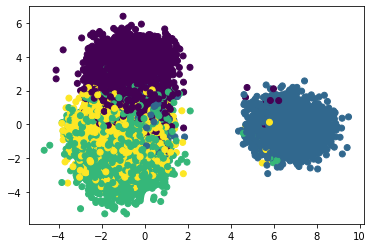

In [73]:
sc = StandardScaler()
X_norm = sc.fit_transform(df)
pca = PCA(n_components=2)
components = pca.fit_transform(X_norm)
#explained variance of the 3 components (how much well we're able to see)
print(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_.sum()

plt.scatter(components[:, 0], components[:, 1], c=kmeans.labels_)
plt.show()

In [74]:
df.head()

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f2,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current
0,0.069769,-5.304294,-9.989233,-3.313071,-2.672482,0.466632,-1.934575,-0.543654,-0.794152,0.040593,...,3.075072,2.682579,1.049357,0.539067,1.997897,1.440183,0.277093,0.462698,3.196192,3.963271
1,-0.396607,-7.557986,-6.757172,-4.035399,-1.691554,-1.837123,-0.861492,-0.578646,-0.070114,-1.084699,...,0.921223,1.089574,0.892152,0.665190,2.834736,2.003717,0.314759,0.469994,2.234707,3.939892
2,0.843336,-4.064155,-9.813102,-4.427802,-3.048554,-0.725644,-1.227282,0.337728,-0.180079,-0.348343,...,0.995964,1.738490,0.684112,0.657757,1.623268,1.783158,0.079913,0.598511,2.110562,3.968693
3,-0.288229,-7.640477,-5.781615,-3.505385,-2.119089,-1.170490,-0.578574,-0.796474,0.391411,0.544625,...,0.512338,1.079702,0.372437,0.849677,2.632377,1.682203,0.037757,0.722920,1.758257,3.969759
4,-0.791232,-7.133791,-7.910312,-2.538680,-2.150410,-0.871752,-0.966725,0.189834,-0.712023,-0.627217,...,2.432009,1.253875,0.658574,0.758675,3.713024,1.625020,0.503656,0.334853,1.777892,3.959930


## Kmeans Intra Group Average (kiga)

In [76]:
df_means = df_cd.groupby('kmeans_label').mean()
df_means.columns = [f'{s}_kiga' for s in list(df_means.columns)]
df_means.head()

,s_00_cd_kiga,s_01_cd_kiga,s_02_cd_kiga,s_03_cd_kiga,s_04_cd_kiga,s_05_cd_kiga,s_06_cd_kiga,s_07_cd_kiga,s_08_cd_kiga,s_09_cd_kiga,...,vib_y_f2_cd_kiga,vib_y_f3_cd_kiga,vib_y_kurt_cd_kiga,vib_y_peak_cd_kiga,vib_y_vel_cd_kiga,vib_z_acc_cd_kiga,vib_z_kurt_cd_kiga,vib_z_peak_cd_kiga,vib_z_vel_cd_kiga,current_cd_kiga
kmeans_label,,,,,,,,,,,,,,,,,,,,,
0,2.235647e-15,-8.234180e-16,-2.493055e-15,-6.146584e-16,3.269426e-17,-1.005089e-16,-4.756528e-17,-2.476410e-17,4.334110e-18,-1.204443e-17,...,-4.312125e-17,-2.339791e-18,7.217235e-17,-5.411356e-17,4.169696e-16,-2.127483e-16,1.083370e-16,3.586633e-17,-2.334766e-16,4.384360e-17
1,-1.550033e-16,7.671554e-15,-2.168144e-16,-4.870929e-16,-2.123133e-15,-1.874409e-15,-7.487071e-16,-5.348710e-17,-9.077519e-17,4.168289e-17,...,-4.310402e-16,-3.078406e-16,-2.673728e-16,2.531879e-16,6.998922e-16,-1.674712e-16,-6.150472e-16,-7.589033e-17,-2.915161e-16,9.245255e-17
2,-1.498276e-05,-1.439838e-03,1.644631e-04,-3.199078e-04,5.653839e-06,1.872546e-04,-7.827277e-05,-1.303209e-04,1.033719e-04,-5.428564e-05,...,-2.436318e-04,-1.623239e-04,2.006992e-05,-2.681837e-05,-6.942698e-05,2.397794e-05,4.708873e-05,-7.988998e-05,-5.040130e-05,-2.741540e-06
3,-8.218857e-05,1.910155e-03,-2.423729e-04,3.526281e-04,-7.020672e-06,-2.122669e-04,8.846964e-05,1.463067e-04,-1.141710e-04,6.218457e-05,...,2.467316e-04,1.598222e-04,-2.163600e-05,2.333786e-05,4.845802e-05,-1.436458e-05,-5.311524e-05,9.945867e-05,1.126226e-04,2.782452e-06


In [78]:
df = pd.merge(df_cd, df_means, left_on='kmeans_label', right_on='kmeans_label', how='left')
df

,s_00_cd,s_01_cd,s_02_cd,s_03_cd,s_04_cd,s_05_cd,s_06_cd,s_07_cd,s_08_cd,s_09_cd,...,vib_y_f2_cd_kiga,vib_y_f3_cd_kiga,vib_y_kurt_cd_kiga,vib_y_peak_cd_kiga,vib_y_vel_cd_kiga,vib_z_acc_cd_kiga,vib_z_kurt_cd_kiga,vib_z_peak_cd_kiga,vib_z_vel_cd_kiga,current_cd_kiga
0,-0.485941,-0.007496,-3.900903,0.237826,-0.674001,1.432541,-0.982106,-0.464260,-0.710967,0.029325,...,-4.310402e-16,-3.078406e-16,-2.673728e-16,2.531879e-16,6.998922e-16,-1.674712e-16,-6.150472e-16,-7.589033e-17,-2.915161e-16,9.245255e-17
1,-0.952317,-2.261188,-0.668843,-0.484502,0.306928,-0.871215,0.090977,-0.499251,0.013070,-1.095968,...,-4.310402e-16,-3.078406e-16,-2.673728e-16,2.531879e-16,6.998922e-16,-1.674712e-16,-6.150472e-16,-7.589033e-17,-2.915161e-16,9.245255e-17
2,0.287626,1.232643,-3.724772,-0.876905,-1.050072,0.240264,-0.274813,0.417122,-0.096894,-0.359611,...,-4.310402e-16,-3.078406e-16,-2.673728e-16,2.531879e-16,6.998922e-16,-1.674712e-16,-6.150472e-16,-7.589033e-17,-2.915161e-16,9.245255e-17
3,-0.843939,-2.343679,0.306715,0.045511,-0.120607,-0.204581,0.373895,-0.717080,0.474595,0.533357,...,-4.310402e-16,-3.078406e-16,-2.673728e-16,2.531879e-16,6.998922e-16,-1.674712e-16,-6.150472e-16,-7.589033e-17,-2.915161e-16,9.245255e-17
4,-1.346942,-1.836993,-1.821982,1.012216,-0.151928,0.094156,-0.014256,0.269228,-0.628839,-0.638485,...,-4.310402e-16,-3.078406e-16,-2.673728e-16,2.531879e-16,6.998922e-16,-1.674712e-16,-6.150472e-16,-7.589033e-17,-2.915161e-16,9.245255e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,0.742964,-5.015615,-0.309104,1.238762,-1.093056,0.572768,1.253367,-0.127264,-0.144608,-0.872060,...,-4.312125e-17,-2.339791e-18,7.217235e-17,-5.411356e-17,4.169696e-16,-2.127483e-16,1.083370e-16,3.586633e-17,-2.334766e-16,4.384360e-17
31796,1.598855,-4.117126,5.225448,-0.419387,-0.327528,-0.098992,1.501609,-0.440948,0.017214,-0.205463,...,2.467316e-04,1.598222e-04,-2.163600e-05,2.333786e-05,4.845802e-05,-1.436458e-05,-5.311524e-05,9.945867e-05,1.126226e-04,2.782452e-06
31797,1.188067,1.658844,2.686554,-2.854336,1.374580,1.075114,0.246210,0.254297,-0.146360,-0.383051,...,-4.312125e-17,-2.339791e-18,7.217235e-17,-5.411356e-17,4.169696e-16,-2.127483e-16,1.083370e-16,3.586633e-17,-2.334766e-16,4.384360e-17
31798,-0.969526,-1.972069,-2.124862,-0.068967,0.777564,-0.058498,-0.463863,-0.883705,0.955492,0.181025,...,-4.312125e-17,-2.339791e-18,7.217235e-17,-5.411356e-17,4.169696e-16,-2.127483e-16,1.083370e-16,3.586633e-17,-2.334766e-16,4.384360e-17
